In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15,6),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [10]:
# Leer datos de aforo de tráfico de Madrid entre 2008 y 2017
aforo = pd.read_csv('201902_Aforos_2008_a_2017-2.csv',encoding = 'iso-8859-1',delimiter = ';', thousands = '.')
aforo.head()

,year,Cinturon,via,bici,moto,resto
0,2008,Interior Primer Cintur¢n,Calle Gran V¡a,11,382,3300
1,2008,Interior Primer Cintur¢n,Calle San Bernardo,10,107,818
2,2008,Interior Primer Cintur¢n,Calle Princesa,3,221,2943
3,2008,Primer Cintur¢n,Calle Gnova,11,531,4140
4,2008,Primer Cintur¢n,Paseo de El Prado,28,748,7830


In [11]:
# Sumar todos los datos de cada año y calcular aforo total 
aforo_year = aforo.groupby(['year']).sum().reset_index()
aforo_year['total'] = aforo_year['bici'] + aforo_year['moto'] + aforo_year['resto']


In [12]:
# CAlcular aforos en %
x = aforo_year['year']
y1= aforo_year['moto']/aforo_year['total']*100
y2 = aforo_year['bici']/aforo_year['total']*100

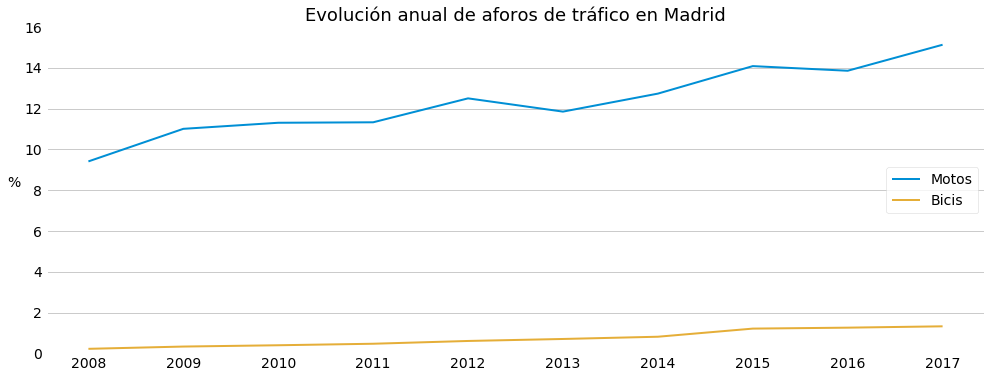

In [13]:
plt.plot(x, y1,lw=2, ls='-', alpha=1, color=sns.color_palette()[0], label='Motos')
plt.plot(x, y2,lw=2, ls='-', alpha=1, color=sns.color_palette()[2],  label='Bicis')

plt.grid(axis='y') 
plt.xticks(x, rotation=0)
plt.axis(ymin= 0 , ymax=16)
plt.ylabel('%', rotation=0, ha = 'right')
plt.legend(loc='right')
plt.title('Evolución anual de aforos de tráfico en Madrid',fontsize= 18)
plt.savefig('images/aforos_2008_2017.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [15]:
# % aforo de motos
y1

0     9.413908
1    11.011592
2    11.308975
3    11.332152
4    12.506002
5    11.856128
6    12.738584
7    14.088233
8    13.860668
9    15.136600
dtype: float64

In [16]:
# % aforo de bicis
y2


0    0.219298
1    0.330922
2    0.394636
3    0.468759
4    0.605036
5    0.702757
6    0.812773
7    1.211314
8    1.257862
9    1.323599
dtype: float64